In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DataSet

In [2]:
df = pd.read_csv('../Feature Enginerring/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory DATA ANALYSIS

In [4]:
df.shape

(891, 12)

 - <h2>Missing Data</h2>

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

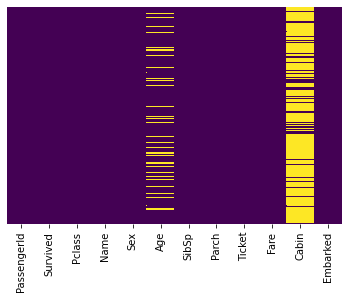

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

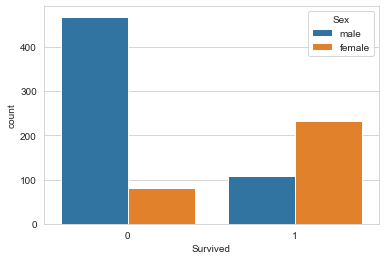

In [9]:

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df,)


<AxesSubplot:xlabel='Survived', ylabel='count'>

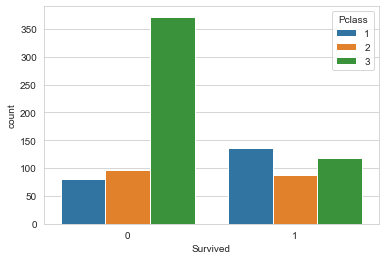

In [10]:
sns.countplot(x = 'Survived', data=df, hue='Pclass')

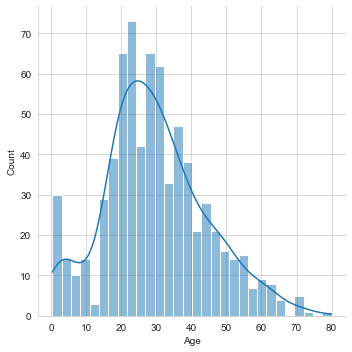

In [11]:
df_ = pd.DataFrame(df['Age'].dropna(), columns=['Age']) 
sns.displot(data=df_,x = 'Age', bins=30, kde=True)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

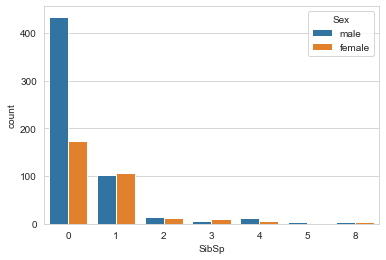

In [12]:
sns.countplot(data=df, x='SibSp', hue='Sex')

<AxesSubplot:>

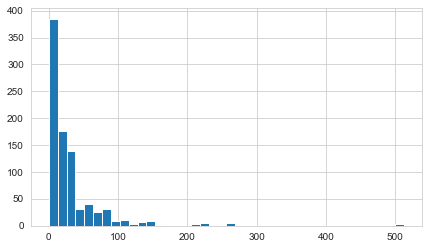

In [13]:
df['Fare'].hist(figsize=(7,4), bins=40,)

### Data Cleaning

In [14]:
df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

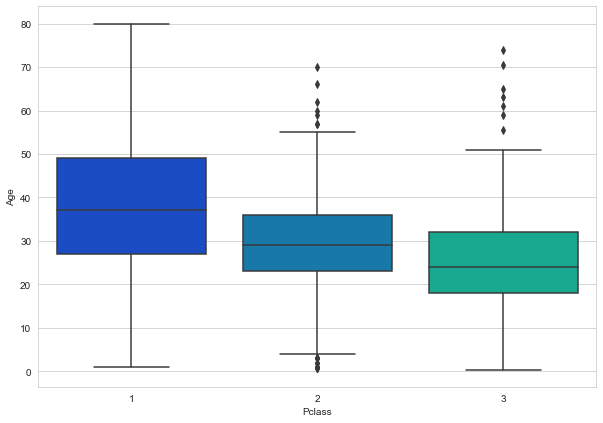

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

<AxesSubplot:>

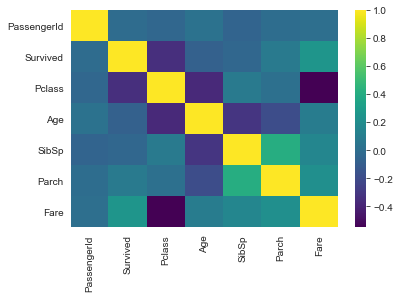

In [16]:
sns.heatmap(df.corr(), cmap='viridis')

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

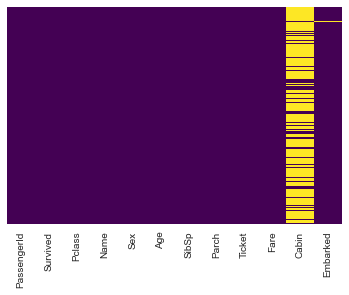

In [19]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [20]:
df.drop('Cabin',inplace=True, axis=1)

In [21]:
sns.box

AttributeError: module 'seaborn' has no attribute 'box'

In [ ]:
sns.heatmap(df.corr(method='pearson'), cmap='viridis')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

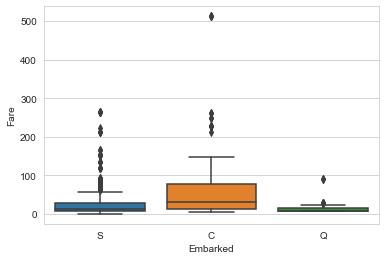

In [22]:
sns.boxplot(x='Embarked',y='Fare',data=df,)

In [23]:
indexes = df[df['Embarked'].isnull()].index
df.drop(index=list(indexes), inplace=True)

<AxesSubplot:>

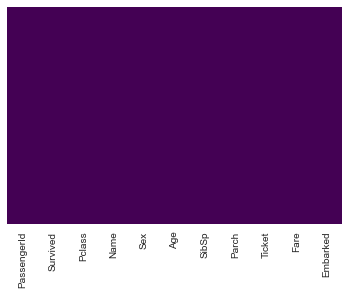

In [24]:
sns.heatmap(data=df.isnull(),yticklabels=False, cmap='viridis', cbar=False)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Converting Categorical Features

In [26]:
embark = pd.get_dummies(data=df['Embarked'],drop_first=True)
sex = pd.get_dummies(data=df['Sex'], drop_first=True)

In [27]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
df = pd.concat([df,sex,embark],axis=1)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Training and Predicting

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
Y = df['Survived']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y.ravel(), test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=5000)

In [47]:
log.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [48]:
y_predict = log.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
conf_matrix = confusion_matrix(y_test,y_predict)

In [50]:
print(conf_matrix)

[[149  14]
 [ 33  71]]


In [51]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8239700374531835

In [52]:
(y_test==y_predict).mean()

0.8239700374531835

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
regressor = RandomForestClassifier()

In [65]:
regressor.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred_rand = regressor.predict(x_test)

In [67]:
accuracy_score(y_test.ravel(), y_pred_rand.ravel())

0.8352059925093633

In [60]:
type(y_pred_rand)

numpy.ndarray

In [61]:
type(y_test)

numpy.ndarray